##**Load Dataset**

In [82]:
# Downloading Product 1 Dataset
!gdown 1xB6sCJcOkqAtH_0sZd0cztxtL0euOeqc

Downloading...
From: https://drive.google.com/uc?id=1xB6sCJcOkqAtH_0sZd0cztxtL0euOeqc
To: /content/DataSet.zip
100% 233M/233M [00:01<00:00, 205MB/s]


In [83]:
# Downloading Product 2 Dataset
!gdown 1B-jgI89pyEgSUbcFrEulTnnCbNgHbuwc

Downloading...
From: https://drive.google.com/uc?id=1B-jgI89pyEgSUbcFrEulTnnCbNgHbuwc
To: /content/AnotherDataSet.zip
100% 176M/176M [00:01<00:00, 164MB/s]


In [84]:
!unzip DataSet.zip

Archive:  DataSet.zip
replace DataSet/Blowhole/Imgs/exp1_num_108719.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: DataSet/Blowhole/Imgs/exp1_num_108719.jpg  
  inflating: DataSet/Blowhole/Imgs/exp1_num_108719.png  
  inflating: DataSet/Blowhole/Imgs/exp1_num_108889.jpg  
  inflating: DataSet/Blowhole/Imgs/exp1_num_108889.png  
  inflating: DataSet/Blowhole/Imgs/exp1_num_262480.jpg  
  inflating: DataSet/Blowhole/Imgs/exp1_num_262480.png  
  inflating: DataSet/Blowhole/Imgs/exp1_num_265077.jpg  
  inflating: DataSet/Blowhole/Imgs/exp1_num_265077.png  
  inflating: DataSet/Blowhole/Imgs/exp1_num_290998.jpg  
  inflating: DataSet/Blowhole/Imgs/exp1_num_290998.png  
  inflating: DataSet/Blowhole/Imgs/exp1_num_297464.jpg  
  inflating: DataSet/Blowhole/Imgs/exp1_num_297464.png  
  inflating: DataSet/Blowhole/Imgs/exp1_num_308015.jpg  
  inflating: DataSet/Blowhole/Imgs/exp1_num_308015.png  
  inflating: DataSet/Blowhole/Imgs/exp1_num_317483.jpg  
  inflating: DataSet/Blowhole/Im

In [85]:
!unzip AnotherDataSet.zip

Archive:  AnotherDataSet.zip
replace Another DataSet/Defect_images/0001_002_00.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Another DataSet/Defect_images/0001_002_00.png  
  inflating: Another DataSet/Defect_images/0002_002_00.png  
  inflating: Another DataSet/Defect_images/0003_002_00.png  
  inflating: Another DataSet/Defect_images/0004_002_01.png  
  inflating: Another DataSet/Defect_images/0005_002_01.png  
  inflating: Another DataSet/Defect_images/0006_002_01.png  
  inflating: Another DataSet/Defect_images/0010_006_02.png  
  inflating: Another DataSet/Defect_images/0011_006_02.png  
  inflating: Another DataSet/Defect_images/0012_006_02.png  
  inflating: Another DataSet/Defect_images/0013_006_02.png  
  inflating: Another DataSet/Defect_images/0014_006_02.png  
  inflating: Another DataSet/Defect_images/0015_006_02.png  
  inflating: Another DataSet/Defect_images/0016_006_02.png  
  inflating: Another DataSet/Defect_images/0017_002_02.png  
  inflating: Another D

In [1]:
# import libraries
import pandas as pd
import numpy as np
import glob
import imageio as imageio
import matplotlib.pyplot as plt
import sklearn
import cv2

In [2]:
project_path = "DataSet"

C:\Users\jawad\AppData\Local\Temp\ipykernel_10976\2708072938.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(pic)


picture shape: (3456, 4608, 3)


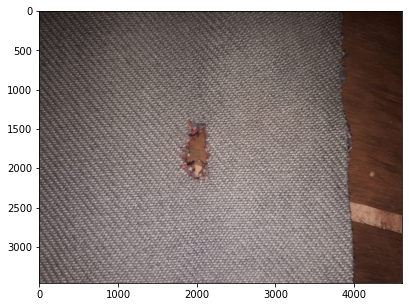

In [3]:
# load a picture
pic = f"{project_path}/captured/Hole/20180531_135018.jpg"
im = imageio.imread(pic)
print(f"picture shape: {im.shape}")
# set display size
plt.figure(figsize=(10,5))
plt.imshow(im, cmap='gray')
plt.show()

In [4]:
def load_file(file_path, label):
  
    # declare the folder name
    folder_name = file_path.split("/")[-1]
    # declare output list
    out_list = []
    ext = ['png','jpg']
    files = []
    [files.extend(glob.glob(f'{file_path}/*.{e}')) for e in ext]
    for image_path in files:
        # read image file
        pic = cv2.imread(image_path,0)
        # img = imutils.resize(pic, height= 200 ,width=800) 
        img = cv2.resize(pic, (800, 200))
        image = img
        # declare temporary dict dtype
        temp = {"name": image_path.split("/")[-1]}
        # set the file label, 0 for non defect. 1 for defect
        temp["label"] = label

        # There are somes images are tensor dtype
        # Thus I fix by selecting only a tensor index zero
        try:
            temp["data"] = image[:,:,0].astype("int")
        except Exception:
            # normal case
            temp["data"] = image.astype("int")
        # append temp into output list
        out_list.append(temp)
    # print process status by checking size of output list
    if not out_list:
        print(f"loading files from folder: {folder_name} is failed")
    else:
        print(f"loading file from folder: {folder_name} is successful")
    # convert list into numpy array dtype
    return np.array(out_list)


###**Prepare file paths**

In [5]:
# All Defect_Images Path
defect_images_path1 = f"{project_path}/Blowhole/Imgs"
defect_images_path2 = f"{project_path}/Break/Imgs"
defect_images_path3 = f"{project_path}/Crack/Imgs"
defect_images_path4 = f"{project_path}/captured/Hole"
defect_images_path5 = f"{project_path}/captured/Lines"
defect_images_path6 = f"{project_path}/hole"
defect_images_path7 = f"{project_path}/horizontal"
defect_images_path8 = f"{project_path}/verticle"
defect_images_path9 = 'Another DataSet' + "/Defect_images"

In [6]:
# All Non_Defect Images Path
project_path = 'Another DataSet'
non_defect_images_path1 = f"{project_path}/NODefect_images/2306881-210020u"
non_defect_images_path2 = f"{project_path}/NODefect_images/2306894-210033u"
non_defect_images_path3 = f"{project_path}/NODefect_images/2311517-195063u"
non_defect_images_path4 = f"{project_path}/NODefect_images/2311694-1930c7u"
non_defect_images_path5 = f"{project_path}/NODefect_images/2311694-2040n7u"
non_defect_images_path6 = f"{project_path}/NODefect_images/2311980-185026u"
non_defect_images_path7 = f"{project_path}/NODefect_images/2608691-202020u"
mask_images_path = f"{project_path}/Mask_images"

###**Load Files**

In [7]:
# Load All Defect Images
defect_images1 = load_file(file_path=defect_images_path1, label=1)
defect_images2 = load_file(file_path=defect_images_path2, label=2)
defect_images3 = load_file(file_path=defect_images_path3, label=3)
defect_images4 = load_file(file_path=defect_images_path4, label=1)
defect_images5 = load_file(file_path=defect_images_path5, label=4)
defect_images6 = load_file(file_path=defect_images_path6, label=1)
defect_images7 = load_file(file_path=defect_images_path7, label=5)
defect_images8 = load_file(file_path=defect_images_path8, label=6)
defect_images9 = load_file(file_path=defect_images_path9, label=4)

loading file from folder: Imgs is successful
loading file from folder: Imgs is successful
loading file from folder: Imgs is successful
loading file from folder: Hole is successful
loading file from folder: Lines is successful
loading file from folder: hole is successful
loading file from folder: horizontal is successful
loading file from folder: verticle is successful
loading file from folder: Defect_images is successful


In [8]:
# Load All Non_Defect Images
non_defect_images1 = load_file(file_path=non_defect_images_path1, label=0)
non_defect_images2 = load_file(file_path=non_defect_images_path2, label=0)
non_defect_images3 = load_file(file_path=non_defect_images_path3, label=0)
non_defect_images4 = load_file(file_path=non_defect_images_path4, label=0)
non_defect_images5 = load_file(file_path=non_defect_images_path5, label=0)
non_defect_images6 = load_file(file_path=non_defect_images_path6, label=0)
non_defect_images7 = load_file(file_path=non_defect_images_path7, label=0)

loading file from folder: 2306881-210020u is successful
loading file from folder: 2306894-210033u is successful
loading file from folder: 2311517-195063u is successful
loading file from folder: 2311694-1930c7u is successful
loading file from folder: 2311694-2040n7u is successful
loading file from folder: 2311980-185026u is successful
loading file from folder: 2608691-202020u is successful


picture shape: (200, 800)


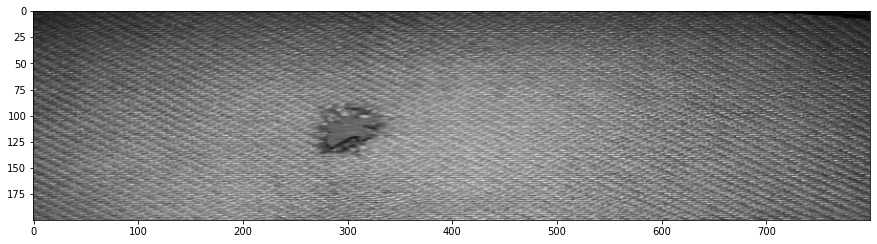

In [9]:
pic = (defect_images4[4]['data'])
im = pic
print(f"picture shape: {im.shape}")
# set display size
plt.figure(figsize=(15,8))
plt.imshow(im,cmap='gray')
plt.show()

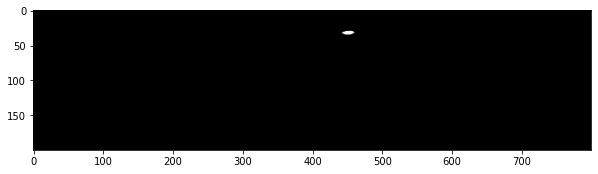

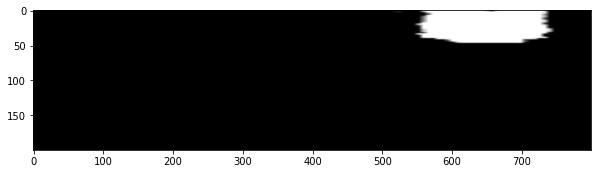

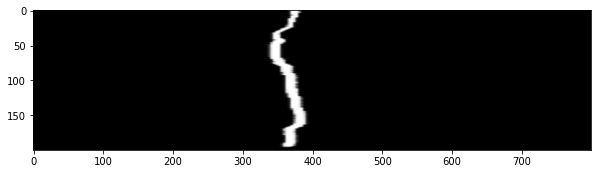

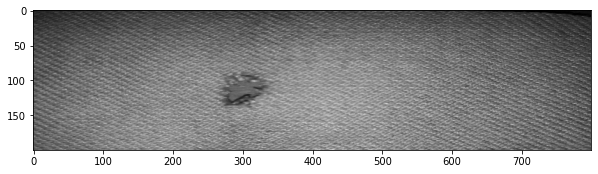

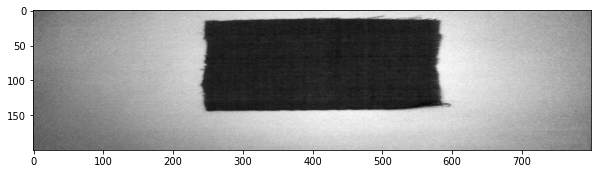

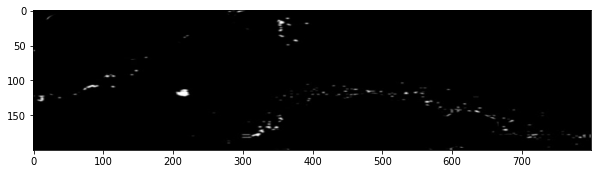

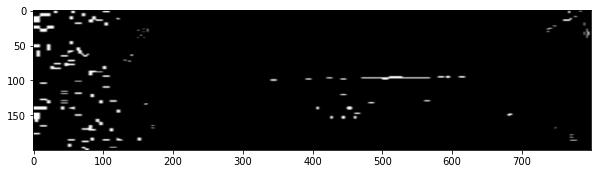

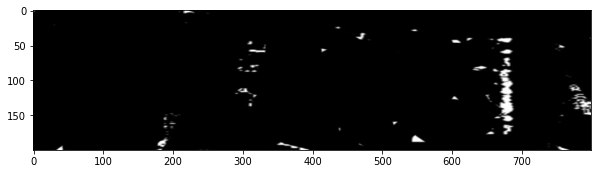

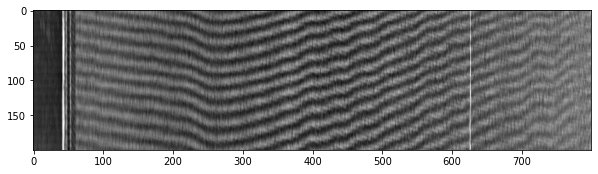

In [10]:
# Show a graph from each defected dataset
pic1 = (defect_images1[10]['data'])
pic2 = (defect_images2[10]['data'])
pic3 = (defect_images3[10]['data'])
pic4 = (defect_images4[4]['data'])
pic5 = (defect_images5[10]['data'])
pic6 = (defect_images6[10]['data'])
pic7 = (defect_images7[10]['data'])
pic8 = (defect_images8[10]['data'])
pic9 = (defect_images9[10]['data'])
plt.figure(figsize=(10,10))
plt.imshow(pic1, cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(pic2, cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(pic3, cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(pic4, cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(pic5, cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(pic6, cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(pic7, cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(pic8, cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(pic9, cmap='gray')
plt.show()

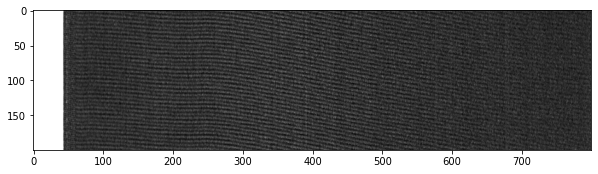

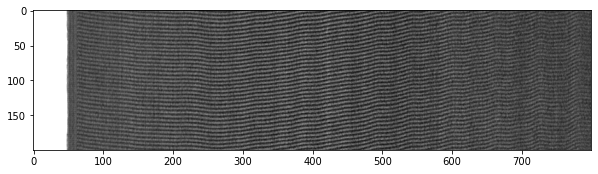

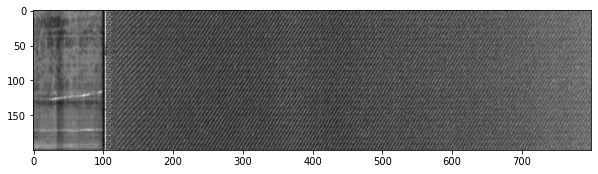

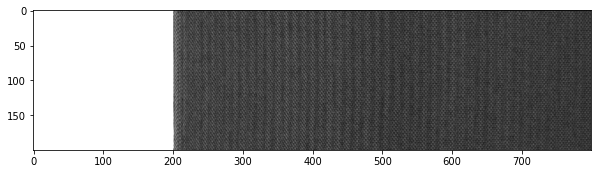

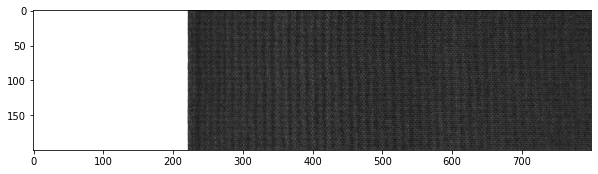

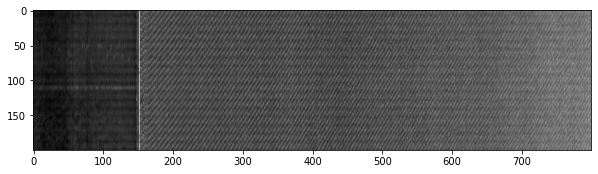

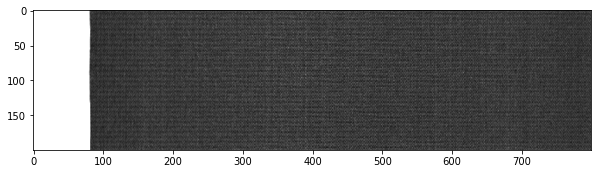

In [11]:
# Show a graph from each non defected dataset
pic1 = (non_defect_images1[10]['data'])
pic2 = (non_defect_images2[10]['data'])
pic3 = (non_defect_images3[10]['data'])
pic4 = (non_defect_images4[10]['data'])
pic5 = (non_defect_images5[10]['data'])
pic6 = (non_defect_images6[10]['data'])
pic7 = (non_defect_images7[10]['data'])

plt.figure(figsize=(10,10))
plt.imshow(pic1, cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(pic2, cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(pic3, cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(pic4, cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(pic5, cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(pic6, cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(pic7, cmap='gray')
plt.show()

In [12]:
# contribute the non defect dataset into one file
non_defect_images = np.concatenate((non_defect_images1, non_defect_images2))
non_defect_images = np.concatenate((non_defect_images, non_defect_images3))
non_defect_images = np.concatenate((non_defect_images, non_defect_images4))
non_defect_images = np.concatenate((non_defect_images, non_defect_images5))
non_defect_images = np.concatenate((non_defect_images, non_defect_images6))
non_defect_images = np.concatenate((non_defect_images, non_defect_images7))

In [13]:
# contribute the defect dataset into one file
defect_images = np.concatenate((defect_images1, defect_images2))
defect_images = np.concatenate((defect_images, defect_images3))
defect_images = np.concatenate((defect_images, defect_images4))
defect_images = np.concatenate((defect_images, defect_images5))
defect_images = np.concatenate((defect_images, defect_images6))
defect_images = np.concatenate((defect_images, defect_images7))
defect_images = np.concatenate((defect_images, defect_images8))
defect_images = np.concatenate((defect_images, defect_images9))

In [14]:
print(f"defect_images.shape: {defect_images.shape}\nnon_defect_images.shape: {non_defect_images.shape} \n")


defect_images.shape: (1286,)
non_defect_images.shape: (141,) 



##**Data Preparation**

In [15]:
# shuffle the order of defect-free and defect images
np.random.shuffle(non_defect_images)
np.random.shuffle(defect_images)
# the class size is the min length compared with defect-free and defect images
class_size = non_defect_images.shape[0] if non_defect_images.shape[0] <= defect_images.shape[0] else defect_images.shape[0]
dataset = np.concatenate((defect_images[:], non_defect_images[:]))
# create an empty matrix X with is matrix of 256x4096 and has dataset length row
X = np.empty([dataset.shape[0], 200, 800]).astype(int)
# create vector y which has dataset length
y = np.empty(dataset.shape[0]).astype(int)
# assign the X,y one-by-one
for i in range(dataset.shape[0]):
    X[i] = dataset[i]["data"]
    y[i] = dataset[i]["label"]
# since Keras acquire the Image input is a tensor type -> we reshape X
X = X.reshape(X.shape[0], 200, 800, 1)
# display size of the label 0 and label 1 
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([141, 511, 170, 114, 263, 136,  92], dtype=int64))

##**Build CNN**

In [16]:
import numpy as np
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras import datasets, layers, models, optimizers, regularizers, callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

##**Training The Model**
In order to train the model the fit() function is called and pass in the chosen parameters.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42)
print(
    f"y_train: number of samples each class: {np.unique(y_train, return_counts=True)}")

print(
    f"y_test: number of samples each class: {np.unique(y_test, return_counts=True)}")

y_train: number of samples each class: (array([0, 1, 2, 3, 4, 5, 6]), array([132, 466, 156,  99, 232, 117,  82], dtype=int64))
y_test: number of samples each class: (array([0, 1, 2, 3, 4, 5, 6]), array([ 9, 45, 14, 15, 31, 19, 10], dtype=int64))


In [19]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [20]:
# One-hot encode outputs
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
class_num = Y_test.shape[1]
class_num

7

In [43]:
def create_model(image_shape=(200, 800, 1), print_summary=False):
    # initial model
    model = models.Sequential()

    # CONV layer: filter 16, stride 7x7
    model.add(layers.Conv2D(filters = 16,kernel_size = (7,7),input_shape=image_shape,activation = 'relu',padding = 'same'))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer 
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(32, (5, 5), padding="same"))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer 
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(64, (3, 3), padding="same"))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer 
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(64, (3, 3), padding="same"))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer 
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(128, (3, 3), padding="same"))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer 
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))
    
    # flatten later -> from matrix to vector
    model.add(layers.Flatten())
    
    # fully connected layer -> nn layer with 64 nodes
    model.add(layers.Dense(64))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer 
    model.add(layers.Activation('relu'))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))
    
    # output layer
    model.add(layers.Dense(7, activation='softmax'))
    
    # set model compiler
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # show the CNN model detail
    if print_summary:
        model.summary()
    return model

create_model(image_shape=(200, 800, 1), print_summary=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 200, 800, 16)      800       
                                                                 
 batch_normalization_60 (Bat  (None, 200, 800, 16)     64        
 chNormalization)                                                
                                                                 
 activation_42 (Activation)  (None, 200, 800, 16)      0         
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 100, 400, 16)     0         
 g2D)                                                            
                                                                 
 dropout_63 (Dropout)        (None, 100, 400, 16)      0         
                                                                 
 conv2d_51 (Conv2D)          (None, 100, 400, 32)    

In [44]:
cnn_model = None
cnn_model = create_model(image_shape=(200, 800, 1))

In [47]:
history = cnn_model.fit(X_train, Y_train,  batch_size=16, epochs=20)

Epoch 1/20
81/81 [==============================] - 145s 2s/step - loss: 1.0585 - accuracy: 0.5794
Epoch 2/20
81/81 [==============================] - 145s 2s/step - loss: 0.8976 - accuracy: 0.6581
Epoch 3/20
81/81 [==============================] - 145s 2s/step - loss: 0.7586 - accuracy: 0.7235
Epoch 4/20
81/81 [==============================] - 145s 2s/step - loss: 0.6924 - accuracy: 0.7414
Epoch 5/20
81/81 [==============================] - 139s 2s/step - loss: 0.6071 - accuracy: 0.7874
Epoch 6/20
81/81 [==============================] - 143s 2s/step - loss: 0.5389 - accuracy: 0.8030
Epoch 7/20
81/81 [==============================] - 145s 2s/step - loss: 0.4520 - accuracy: 0.8318
Epoch 8/20
81/81 [==============================] - 145s 2s/step - loss: 0.4623 - accuracy: 0.8076
Epoch 9/20
81/81 [==============================] - 147s 2s/step - loss: 0.4242 - accuracy: 0.8435
Epoch 10/20
81/81 [==============================] - 139s 2s/step - loss: 0.4006 - accuracy: 0.8544
Epoch 11/

In [48]:
# save trained model and also its history
from keras.models import save_model
save_model(cnn_model, "best_model.h5")
np.save('my_history.npy',history.history)

##**Load Model**

In [21]:
from numpy import loadtxt
from keras.models import load_model
import numpy as np
model = load_model('best_model.h5')
history=np.load('my_history.npy',allow_pickle='TRUE').item()
# summarize model.
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 200, 800, 16)      800       
                                                                 
 batch_normalization_66 (Bat  (None, 200, 800, 16)     64        
 chNormalization)                                                
                                                                 
 activation_48 (Activation)  (None, 200, 800, 16)      0         
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 100, 400, 16)     0         
 g2D)                                                            
                                                                 
 dropout_69 (Dropout)        (None, 100, 400, 16)      0         
                                                                 
 conv2d_56 (Conv2D)          (None, 100, 400, 32)    

##**Validate Trained Model**

In [22]:
# Model evaluation
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 89.51%


In [23]:
from sklearn.metrics import classification_report
predIdxs = model.predict(X_test)
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(y_test, predIdxs))

5/5 [==============================] - 3s 578ms/step
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.88      0.93      0.90        45
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        15
           4       0.80      0.90      0.85        31
           5       0.94      0.84      0.89        19
           6       1.00      0.90      0.95        10

    accuracy                           0.90       143
   macro avg       0.92      0.86      0.88       143
weighted avg       0.90      0.90      0.89       143



In [24]:
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=predIdxs)
confusion_matrix

array([[ 4,  0,  0,  0,  5,  0,  0],
       [ 0, 42,  0,  0,  2,  1,  0],
       [ 0,  0, 14,  0,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  0],
       [ 1,  2,  0,  0, 28,  0,  0],
       [ 0,  3,  0,  0,  0, 16,  0],
       [ 0,  1,  0,  0,  0,  0,  9]], dtype=int64)

<AxesSubplot:>

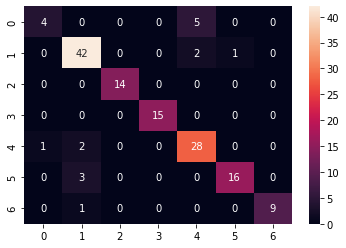

In [26]:
#Plot Confusion Matrix
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

<AxesSubplot:>

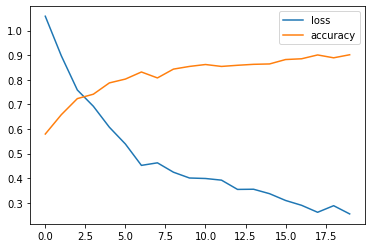

In [27]:
import pandas as pd
pd.DataFrame(history).plot()

##**Testing The Model**
Take a sample image from the dataset and pass it to the model in order to check the model is accurately predicting or not

In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np
def predictImage(filename):
    img1 = filename
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X.reshape((1,200,800,1)))
    val=list(val[0])
    mx=max(val)
    print(f'{mx*100:.2f}% Accurate')
    val = val.index(mx)
    print(f'Label Index is {val}')
    if val == 0:
        plt.xlabel("Non-Defects",fontsize=30)
    elif val == 1:
        plt.xlabel("Blowhole",fontsize=30)
    elif val == 2:
        plt.xlabel("Break",fontsize=30)
    elif val == 3:
        plt.xlabel("Cracks",fontsize=30)
    elif val in {4, 6}:
        plt.xlabel("Hole",fontsize=30)
    elif val in {5, 9}:
        plt.xlabel("Lines",fontsize=30)
    elif val == 7:
        plt.xlabel("Horizontal",fontsize=30)
    elif val == 8:
        plt.xlabel("Verticle",fontsize=30)

1/1 [==============================] - 0s 84ms/step
98.74% Accurate
Label Index is 2


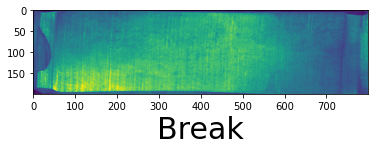

In [35]:
predictImage(X_train[5])

1/1 [==============================] - 0s 88ms/step
94.83% Accurate
Label Index is 3


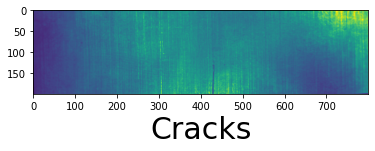

In [30]:
predictImage(X_train[4])